###Install TF-DF & Import Library

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 2.6 MB/s eta 0:00:00


In [ ]:
import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os

%matplotlib inline

###Download Data

In [ ]:
csv_file = tf.keras.utils.get_file('.csv', 'https://raw.githubusercontent.com/alflaylah/Trial-Predict-Carbon-Emission-Using-TFDF/main/Data_Emisi_Mobil_dan_motor_DKI_Jakarta.csv')


197871/197871 [==============================] - 0s 0us/step


###Inspecting Data

In [ ]:
# Read csv file

data = pd.read_csv(csv_file)

print(data.head(10))
print('\n')
print(data.dtypes)

  BahanBakar JenisKendaraan  HasilUjiEmisi
0     Bensin            SUV           0.02
1     Bensin  MPV/ MINI BUS           0.19
2     Bensin  MPV/ MINI BUS           0.01
3     Bensin      HATCHBACK           0.03
4     Bensin  MPV/ MINI BUS           0.38
5     Bensin      HATCHBACK           0.23
6     Bensin        PICK UP           0.02
7     Bensin            SUV           0.01
8     Bensin  MPV/ MINI BUS           0.07
9     Bensin  MPV/ MINI BUS           0.45


BahanBakar         object
JenisKendaraan     object
HasilUjiEmisi     float64
dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9001 entries, 0 to 9000
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BahanBakar      9001 non-null   object 
 1   JenisKendaraan  9001 non-null   object 
 2   HasilUjiEmisi   9001 non-null   float64
dtypes: float64(1), object(2)
memory usage: 211.1+ KB


In [ ]:
# ngecek data null

data_null = data.isnull().values.any()

if data_null:
  print("Ada data null")
else:
  print("Tidak ada data null")

Tidak ada data null


In [ ]:
# melihat data apa saja yg ada di kolom jenis kendaraan

jenis_kendaraan = data['JenisKendaraan'].value_counts()
print("Jenis Kendaraan dan Banyaknya:\n", jenis_kendaraan)

Jenis Kendaraan dan Banyaknya:
 MOTOR            4001
MPV/ MINI BUS    3401
SUV               612
HATCHBACK         408
SEDAN             348
PICK UP           105
JEEP               51
WAGON              29
BOX                17
TRUCK               8
CONVERTIBLE         7
LAINNYA             5
BUS                 4
COUPE               3
MOTOR 2 TAK         2
Name: JenisKendaraan, dtype: int64


In [ ]:
# hapus data untuk wagon, box, truck, convertible, lainnya, coupe, motor 2 tak
unused_data = ['WAGON', 'BOX', 'TRUCK', 'CONVERTIBLE', 'LAINNYA', 'COUPE', 'MOTOR 2 TAK']

data = data[~data['JenisKendaraan'].isin(unused_data)]

# melihat data apa saja yg ada di kolom jenis kendaraan setelah menghapus unused data
jenis_kendaraan = data['JenisKendaraan'].value_counts()
print("Jenis Kendaraan dan Banyaknya:\n", jenis_kendaraan)

Jenis Kendaraan dan Banyaknya:
 MOTOR            4001
MPV/ MINI BUS    3401
SUV               612
HATCHBACK         408
SEDAN             348
PICK UP           105
JEEP               51
BUS                 4
Name: JenisKendaraan, dtype: int64


In [ ]:
# konversi categorical data ke integer categorical data

# membuat kamus pemetaan untuk JenisKendaraan
mapping1 = {'MOTOR': 1, 'MPV/ MINI BUS': 2, 'SUV': 3, 'HATCHBACK': 4, 'SEDAN': 5, 'PICK UP': 6, 'JEEP': 7, 'BUS': 8}
# terapkan pemetaan dengan metode map()
data['JenisKendaraan'] = data['JenisKendaraan'].map(mapping1)


print(data)

     BahanBakar  JenisKendaraan  HasilUjiEmisi
0        Bensin               3           0.02
1        Bensin               2           0.19
2        Bensin               2           0.01
3        Bensin               4           0.03
4        Bensin               2           0.38
...         ...             ...            ...
8996     Bensin               1           0.09
8997     Bensin               1           0.59
8998     Bensin               1           2.06
8999     Bensin               1           0.38
9000     Bensin               1           1.16

[8930 rows x 3 columns]


<ipython-input-9-b8c754d5927f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JenisKendaraan'] = data['JenisKendaraan'].map(mapping1)


In [ ]:
# konversi categorical data ke integer categorical data

# membuat kamus pemetaan untuk BahanBakar
mapping2 = {'Bensin': 0}
# terapkan pemetaan dengan metode map()
data['BahanBakar'] = data['BahanBakar'].map(mapping2)


print(data)

      BahanBakar  JenisKendaraan  HasilUjiEmisi
0              0               3           0.02
1              0               2           0.19
2              0               2           0.01
3              0               4           0.03
4              0               2           0.38
...          ...             ...            ...
8996           0               1           0.09
8997           0               1           0.59
8998           0               1           2.06
8999           0               1           0.38
9000           0               1           1.16

[8930 rows x 3 columns]


<ipython-input-10-67de5c2914bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BahanBakar'] = data['BahanBakar'].map(mapping2)


In [ ]:
# info data setelah categorical data diubah

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8930 entries, 0 to 9000
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BahanBakar      8930 non-null   int64  
 1   JenisKendaraan  8930 non-null   int64  
 2   HasilUjiEmisi   8930 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 279.1 KB


count    8930.000000
mean        0.856738
std         1.443880
min         0.001000
25%         0.020000
50%         0.160000
75%         1.000000
max        10.000000
Name: HasilUjiEmisi, dtype: float64


<ipython-input-12-c135c398d4ae>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HasilUjiEmisi'], color='b', bins=100, hist_kws={'alpha': 0.4});


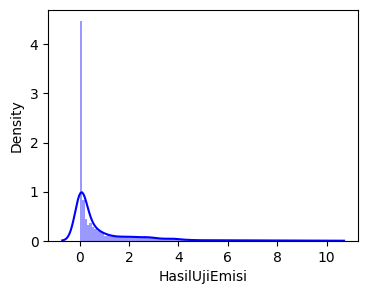

In [ ]:
# HasilUjiEmisi Distribution

print(data['HasilUjiEmisi'].describe())
plt.figure(figsize=(4,3))
sns.distplot(data['HasilUjiEmisi'], color='b', bins=100, hist_kws={'alpha': 0.4});


In [ ]:
# List all the types of data from the dataset

list(set(data.dtypes.tolist()))

[dtype('float64'), dtype('int64')]

In [ ]:
# Split dataset into training and validation dataset

def split_dataset(dataset, training_ratio=0.8):
  # Shuffle the dataset randomly using pandas' object (sample)
  # frac=1 -> specifies that we want to sample the entire dataframe
  dataset = dataset.sample(frac=1)

  # Calculate the number of samples for each split
  num_samples = len(dataset)
  num_training = int(training_ratio * num_samples)

  # Split dataset
  training_data = dataset[:num_training]
  validation_data = dataset[num_training:]

  return training_data, validation_data

training_data_pd, validation_data_pd = split_dataset(data)

print(" {} examples in training dataset.".format(len(training_data_pd)))
print(" {} examples in validation dataset.".format(len(validation_data_pd)))

 7144 examples in training dataset.
 1786 examples in validation dataset.


In [ ]:
# first 10 data for training
print(training_data_pd.head(10))
print('\n')
print(data.dtypes)

      BahanBakar  JenisKendaraan  HasilUjiEmisi
2012           0               3           0.01
6836           0               1           0.28
893            0               2           0.04
114            0               5           1.37
4332           0               2           0.09
1007           0               3           0.02
5830           0               1           2.03
6757           0               1           0.51
4224           0               2           0.60
8662           0               1           1.89


BahanBakar          int64
JenisKendaraan      int64
HasilUjiEmisi     float64
dtype: object


In [ ]:
# first 10 data for validation
print(validation_data_pd.head(10))
print('\n')
print(data.dtypes)

      BahanBakar  JenisKendaraan  HasilUjiEmisi
8424           0               1           3.08
8980           0               1           0.13
3770           0               2           0.01
4542           0               2           0.13
1097           0               2           0.04
1445           0               4           0.01
8444           0               1           5.29
3261           0               2           1.39
8625           0               1           0.07
2189           0               4           0.02


BahanBakar          int64
JenisKendaraan      int64
HasilUjiEmisi     float64
dtype: object


In [ ]:
# Convert dataset from pd format to tf dataset format

label = 'HasilUjiEmisi'
task = tfdf.keras.Task.REGRESSION

training_data = tfdf.keras.pd_dataframe_to_tf_dataset(training_data_pd, label=label, task=task, batch_size=100)
validation_data = tfdf.keras.pd_dataframe_to_tf_dataset(validation_data_pd, label=label, task=task, batch_size=100)
#test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_data_pd, label=label, task=task, batch_size=100)


###Training Model

In [ ]:
# All tree-based models in TF-DF

tfdf.keras.get_all_models()


[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
# Use random forest model

task = tfdf.keras.Task.REGRESSION
rf_model = tfdf.keras.RandomForestModel(task=task, verbose=2)


Use 2 thread(s) for training
Use /tmp/tmpeo0z78lt as temporary training directory


In [ ]:
# Training the model (with monitoring MSE)

monitor = "mean_squared_error" # metric to monitor
patience = 10 # number of epochs with no improvement after which training will be stopped

# loss_history_callback = tf.keras.callbacks.LossHistory()
# rf_model.fit(training_data, callbacks=[loss_history_callback])

rf_model.fit(training_data,
             monitor=monitor,
             early_stopping_rounds=patience)

Reading training dataset...
Training tensor examples:
Features: {'BahanBakar': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'JenisKendaraan': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>}
Label: Tensor("data_2:0", shape=(None,), dtype=float64)
Weights: None
Normalized tensor features:
 {'BahanBakar': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'JenisKendaraan': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>)}
Training dataset read in 0:00:05.376401. Found 7144 examples.
Training model...
Standard output detected as not visible to the user e.g. running in a notebook. Creating a training log redirection. If training gets stuck, try calling tfdf.keras.set_training_logs_redirection(False).


[INFO 23-12-21 09:04:07.0712 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 23-12-21 09:04:07.0713 UTC kernel.cc:772] Collect training examples
[INFO 23-12-21 09:04:07.0713 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-12-21 09:04:07.0718 UTC kernel.cc:391] Number of batches: 72
[INFO 23-12-21 09:04:07.0718 UTC kernel.cc:392] Number of examples: 7144
[INFO 23-12-21 09:04:07.0723 UTC kernel.cc:792] Training dataset:
Number of records: 7144
Number of columns: 3

Number of columns by type:
	NUMERICAL: 3 (100%)

Columns:

NUMERICAL: 3 (100%)
	0: "BahanBakar" NUMERICAL mean:0 min:0 max:0 sd:0
	1: "JenisKendaraan" NUMERICAL mean:1.90006 min:1 max:8 sd:1.17234
	2: "__LABEL" NUMERICAL mean:0.84769 min:0.001 

Model trained in 0:00:00.732544
Compiling model...
Model compiled.


In [ ]:
# Visualize the Model
# Default number of trees used in random forests is 300

tfdf.model_plotter.plot_model_in_colab(rf_model, tree_idx=0, max_depth=5)

###Model Evaluation

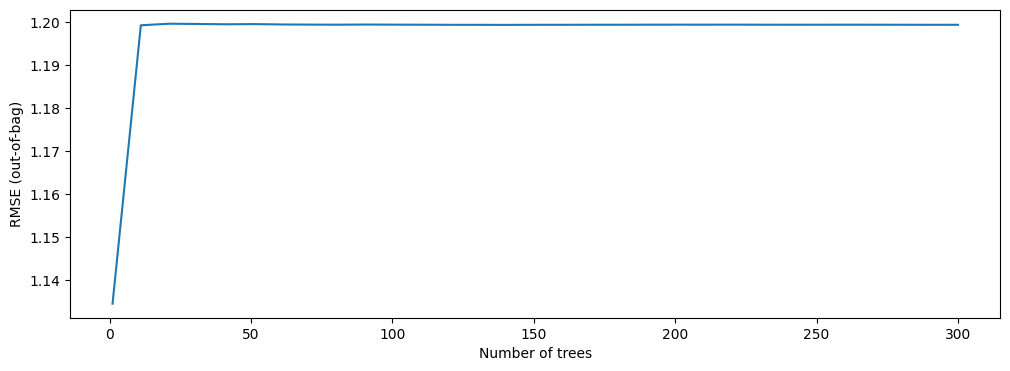

In [ ]:
logs = rf_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))


plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")

plt.show()

In [ ]:
# some general stats on the OOB dataset

inspect = rf_model.make_inspector()
inspect.evaluation()


Evaluation(num_examples=7144, accuracy=None, loss=None, rmse=1.1993242806919873, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
# evaluation using validation dataset
import math

rf_model.compile(metrics=['mse'])
evaluation = rf_model.evaluate(x=validation_data, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")

18/18 [==============================] - 2s 8ms/step - loss: 0.0000e+00 - mse: 1.4948
{'loss': 0.0, 'mse': 1.4948272705078125}

MSE: 1.4948272705078125
RMSE: 1.2226312896813218


In [ ]:
# model summary

rf_model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (2):
	BahanBakar
	JenisKendaraan

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "JenisKendaraan"  1.000000 

Variable Importance: NUM_AS_ROOT:
    1. "JenisKendaraan" 300.000000 

Variable Importance: NUM_NODES:
    1. "JenisKendaraan" 1817.000000 

Variable Importance: SUM_SCORE:
    1. "JenisKendaraan" 1315252.498694 



Out-of-bag evaluation: rmse:1.19932
Number of trees: 300
Total number of nodes: 3934

Number of nodes by tree:
Count: 300 Average: 13.1133 StdDev: 0.462409
Min: 13 Max: 15 Ignored: 0
----------------------------------------------
[ 13, 14) 283  94.33%  94.33% ######

###Model Predict

In [ ]:
# Prediction on new dataframe

# data yang akan diprediksi
new_data = {'BahanBakar': [0, 0, 0, 0, 0, 0, 0, 0],
             'JenisKendaraan': [1, 2, 3, 4, 5, 6, 7, 8]}

# ubah ke format pandas
new_data_df = pd.DataFrame(new_data)

# ubah ke format tf data
test_data = tfdf.keras.pd_dataframe_to_tf_dataset(new_data_df, task=task)

# prediksi
predictions = rf_model.predict(test_data)

# Extract predictions and add them to the original DataFrame
new_data_df['JumlahEmisi'] = predictions.squeeze()

# Pilih kolom untuk prediksi ouput
output_predictions = new_data_df[['JenisKendaraan', 'JumlahEmisi']].sort_values(by='JumlahEmisi')

# Reset index agar urutan benar
output_predictions.reset_index(drop=True, inplace=True)

# Tampilkan output rekomendasi yang didapatkan dari hasil prediksi (Diurutkan dari yang paling kecil)
print("\nRekomendasi Kendaraan beserta Jumlah Emisi:\n")
print(output_predictions)

1/1 [==============================] - 0s 172ms/step

Rekomendasi Kendaraan beserta Jumlah Emisi:

   JenisKendaraan  JumlahEmisi
0               4     0.063870
1               3     0.093266
2               6     0.137295
3               2     0.140622
4               5     0.269526
5               8     0.393599
6               7     0.411122
7               1     1.712514


###Save The Model

In [ ]:
# TF-DF doesn't directly support saving models in HDF5 format ('.h5')
# We can convert the TF-DF model to a TF SavedModel format


# Export the Model with the TF.SavedModel format
saved_model_path = "/content/saved_model"
rf_model.save(saved_model_path)

In [ ]:
# Load model (it loads as a generic keras model)

loaded_model = tf.keras.models.load_model(saved_model_path)
loaded_model

In [ ]:
!zip -r saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/keras_metadata.pb (deflated 68%)
  adding: content/saved_model/saved_model.pb (deflated 83%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/assets/e1724443b33d4c4anodes-00000-of-00001 (deflated 52%)
  adding: content/saved_model/assets/e1724443b33d4c4arandom_forest_header.pb (deflated 78%)
  adding: content/saved_model/assets/e1724443b33d4c4aheader.pb (deflated 22%)
  adding: content/saved_model/assets/e1724443b33d4c4adata_spec.pb (deflated 15%)
  adding: content/saved_model/assets/e1724443b33d4c4adone (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 46%)
  adding: content/saved_model/variables/variables.data-00000-of-00001 (deflated 59%)
  adding: content/saved_model/fingerprint.pb (stored 0%)


In [ ]:
# Ubah model turunan menjadi model Sequential

# Asumsikan data input memiliki shape
input_shape = (2,)

# Buat model Sequential dari loaded model's layers
sequential_model = tf.keras.Sequential(loaded_model.layers)

# Build model with the specified input shape
sequential_model.build(input_shape)

# Create dummy input data
dummy_input = np.zeros((1,) + input_shape)

# Call the model on the dummy input to create weights
_ = sequential_model(dummy_input)

# Simpan model dalam format HDF5
h5_model_path = "/content/saved_model/model.h5"
sequential_model.save(h5_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(tf.version.VERSION)

2.15.0
